<a href="https://colab.research.google.com/github/dev-bhaveshye/Machine-Learning/blob/main/Handling_Missing_Data_(cc).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/data_science_job.csv')
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [ ]:
df.isnull().mean()*100


,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [ ]:
new_df=df[['city_development_index','enrolled_university','education_level','training_hours']]
new_df.head()

,city_development_index,enrolled_university,education_level,training_hours
0,0.920,no_enrollment,Graduate,36.0
1,0.776,no_enrollment,Graduate,47.0
2,0.624,Full time course,Graduate,83.0
3,0.789,NaN,Graduate,52.0
4,0.767,no_enrollment,Masters,8.0


In [ ]:
len(new_df.dropna())/len(df)

0.8993631903121412

In [ ]:
droped_df=new_df.dropna()
droped_df.head()

,city_development_index,enrolled_university,education_level,training_hours
0,0.920,no_enrollment,Graduate,36.0
1,0.776,no_enrollment,Graduate,47.0
2,0.624,Full time course,Graduate,83.0
4,0.767,no_enrollment,Masters,8.0
5,0.764,Part time course,Graduate,24.0


In [ ]:
new_df.shape , droped_df.shape

((19158, 4), (17230, 4))

<Axes: >

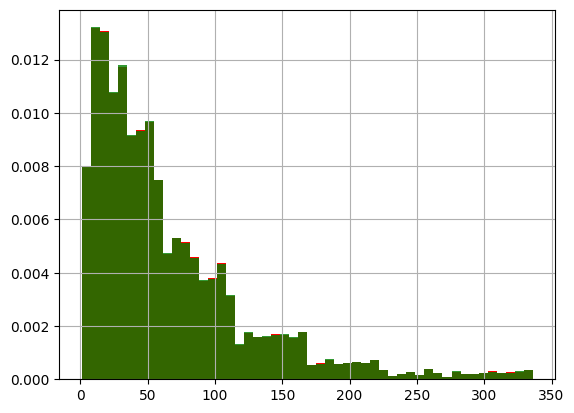

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
# original data
new_df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
droped_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

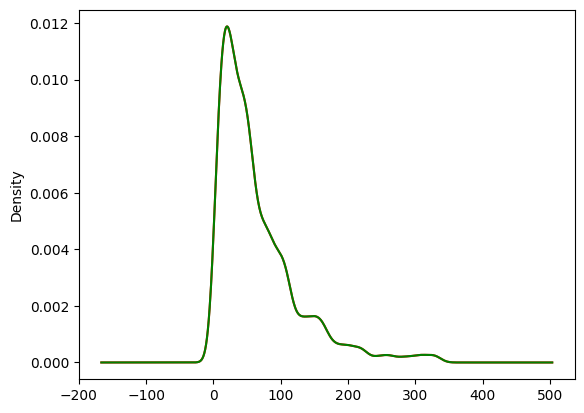

In [ ]:
df['training_hours'].plot.density(color='red')

# data after cca
new_df['training_hours'].plot.density(color='green')

In [ ]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['enrolled_university'].value_counts() / len(df),

            # percentage of observations per category, cca data
            droped_df['enrolled_university'].value_counts() / len(droped_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
enrolled_university,,
no_enrollment,0.721213,0.734881
Full time course,0.196106,0.201161
Part time course,0.062533,0.063958


In [ ]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            droped_df['education_level'].value_counts() / len(droped_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.673128
Masters,0.227633,0.253105
High School,0.105282,0.117063
Phd,0.021610,0.024028
Primary School,0.016077,0.017876
